## Applying different models in House Price Predictions

In [1]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [2]:
from pylab import rcParams
rcParams['figure.figsize'] = 20,10

In [3]:
from sklearn.metrics import mean_squared_error

In [4]:
train = pd.read_csv('../../Dataset/House Prediction/train.csv')

In [5]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
from collections import Counter
def findMode(series):
    '''
        Find the mode of the series
        Replace the nan values by the mode
    '''
    j = 1
    mode = Counter(series).most_common(10)[0][0]
    while str(mode) == 'nan':
        try:
            mode = Counter(series).most_common(10)[j][0]
        except:
            mode = 0
            break
        j += 1
    return mode

In [7]:
# Categorical Encoding of Nominal Features
# for i in train.columns:
#     mode = findMode(train[i])
#     train[i] = train[i].fillna(mode)
#     if train[i].dtype == 'object':
#         train[i] = train[i].astype('category').cat.codes

In [8]:
## One Hot Encoding of Nominal Features

for i in train.columns:
    mode = findMode(train[i])
    train[i] = train[i].fillna(mode)
train = pd.get_dummies(train)
train.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 290 entries, Id to SaleCondition_Partial
dtypes: float64(255), int64(35)
memory usage: 3.2 MB


In [10]:
ID = train.pop('Id')
y = train.pop('SalePrice')

In [11]:
train = train.fillna(method='ffill')
train.isnull().values.any()

False

In [12]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit(train).transform(train)
print np.mean(X)
print np.std(X)

1.68692220686e-16
1.0


In [13]:
from sklearn.cross_validation import train_test_split

In [14]:
def fitModel(model,X,y):
    print 'Model: {}'.format(model)
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=7)
    model.fit(X_train,y_train)
    print 'Training RMSE: {}'.format(np.sqrt(mean_squared_error(y_train,model.predict(X_train))))
    print 'Testing RMSE: {}'.format(np.sqrt(mean_squared_error(y_test,model.predict(X_test))))
    print '='*5

In [15]:
def rmse(estimator,X,y):
    return np.sqrt(mean_squared_error(y,estimator.predict(X)))

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

In [17]:
models = [LinearRegression(),SVR(),RandomForestRegressor(n_estimators=100)]

In [18]:
for model in models:
    fitModel(model,X,y)

Model: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
Training RMSE: 17746.589677
Testing RMSE: 7.77003886663e+16
=====
Model: SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
Training RMSE: 78713.1140526
Testing RMSE: 88048.018565
=====
Model: RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
Training RMSE: 11500.5547273
Testing RMSE: 30634.9571047
=====


So far, best Model is Random Forest Regressor :)

In [19]:
model = RandomForestRegressor(n_estimators=100)

In [20]:
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=7)

In [21]:
model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [22]:
features = pd.Series(model.feature_importances_,index=train.columns)
features.head()

MSSubClass     0.001812
LotFrontage    0.006430
LotArea        0.015551
OverallQual    0.571777
OverallCond    0.003774
dtype: float64

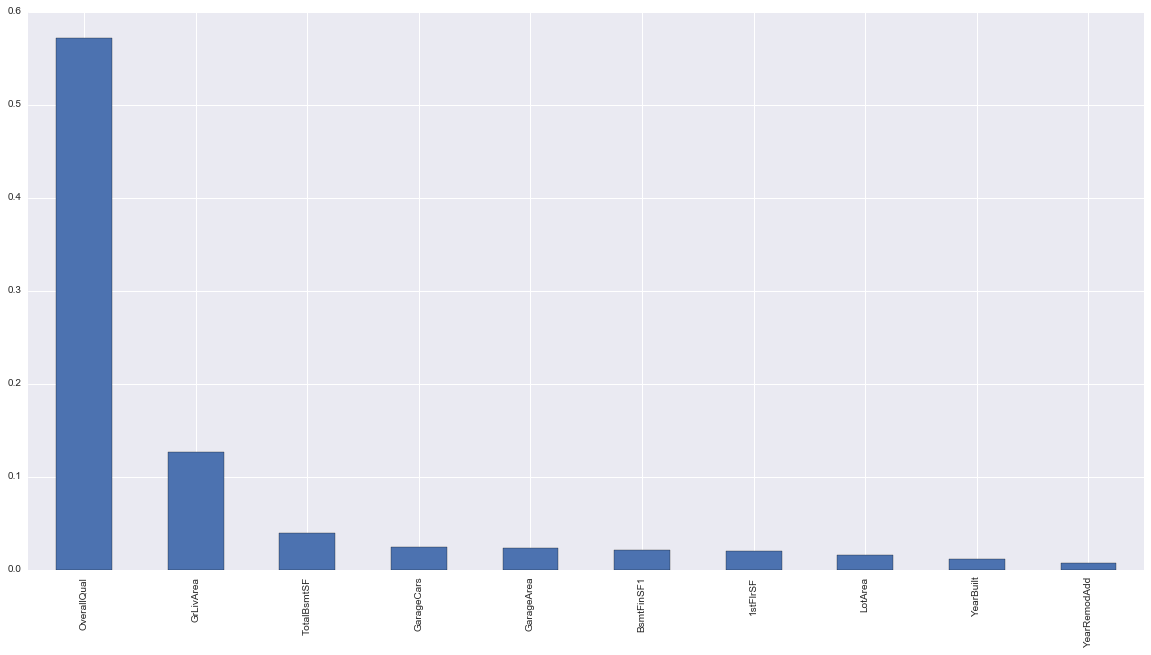

In [23]:
important_features = features.sort_values(ascending=False).head(10)
features.sort_values(ascending=False).head(10).plot(kind='bar')

In [24]:
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap

In [25]:
pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)
print X_pca.shape
print 'Variance Retained: {}'.format(pca.explained_variance_ratio_.sum())

(1460, 2)
Variance Retained: 0.0917020123307


In [26]:
iso = Isomap(n_components=2)
iso.fit(X)
X_iso = iso.transform(X)
print X_iso.shape

(1460, 2)


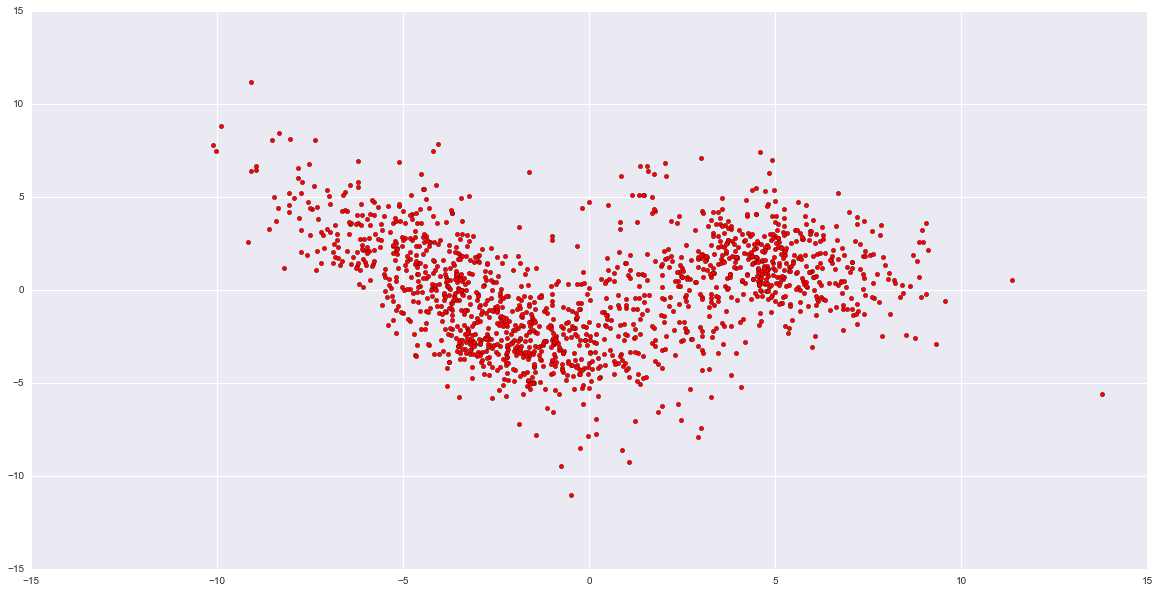

In [27]:
plt.scatter(X_pca[:,0],X_pca[:,1],c='r')

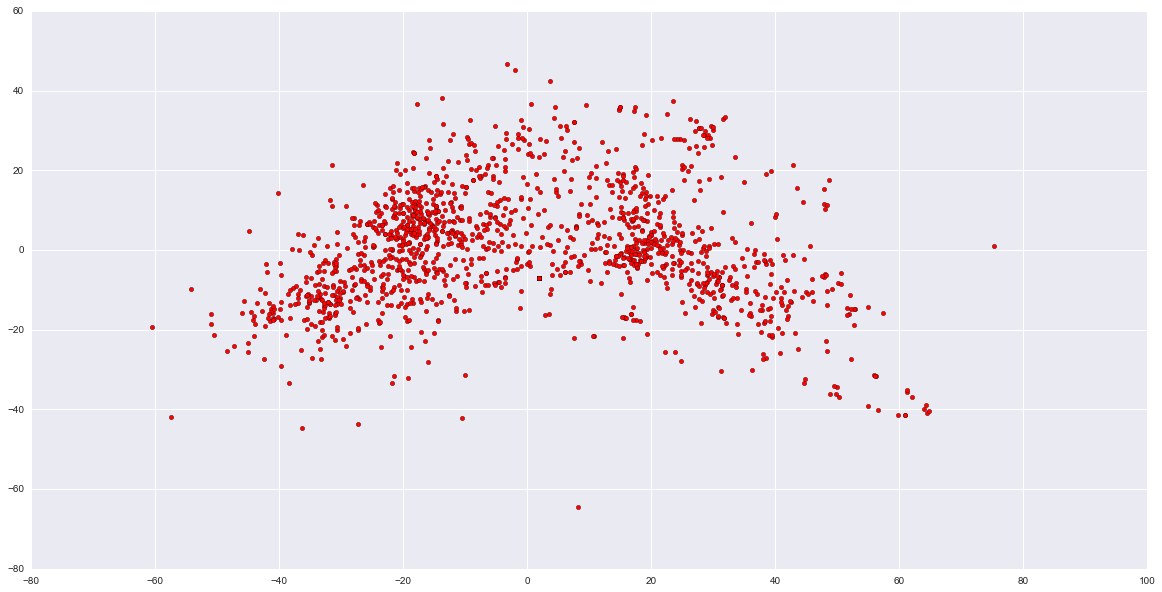

In [28]:
plt.scatter(X_iso[:,0],X_iso[:,1],c='r')

## Checking 'skewness' of the data

In [29]:
train_copy = train.copy()

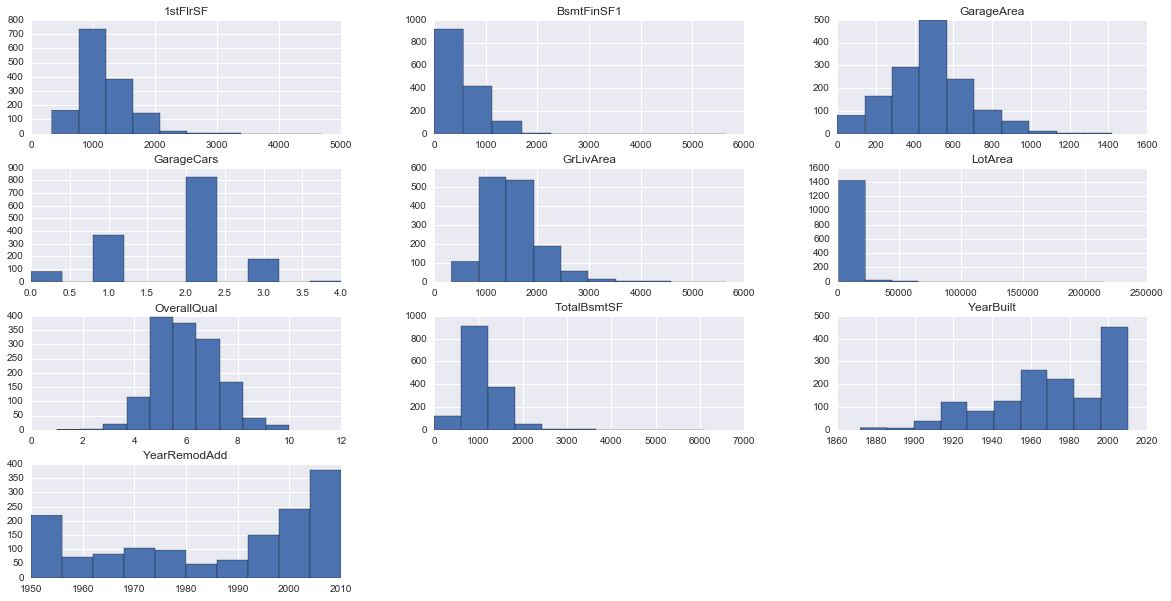

In [30]:
inprt_feat_ind = important_features.index
train_copy[inprt_feat_ind].hist()
plt.show()

Above plots denote that most of the features are skewed. Thus it is advisable to convert the data to normal form so that learning can be applied efficiently

### Handling skewed features
Use scipy.stats.skew to find the skewness of the data

In [31]:
from scipy.stats import skew

In [32]:
skewness = pd.Series(skew(train_copy),index=train.columns)

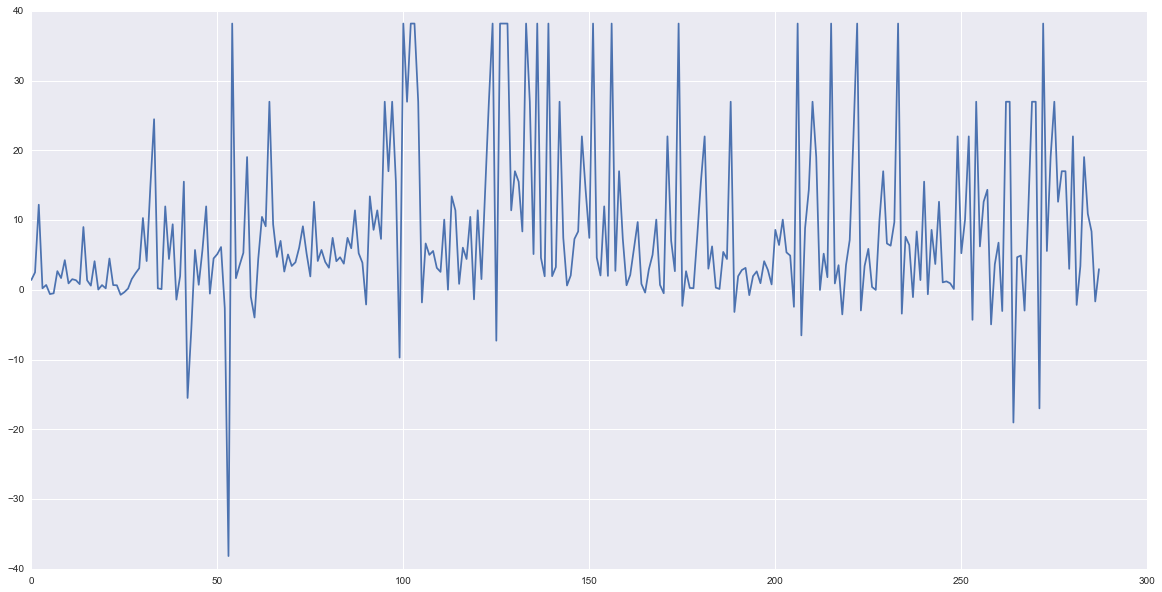

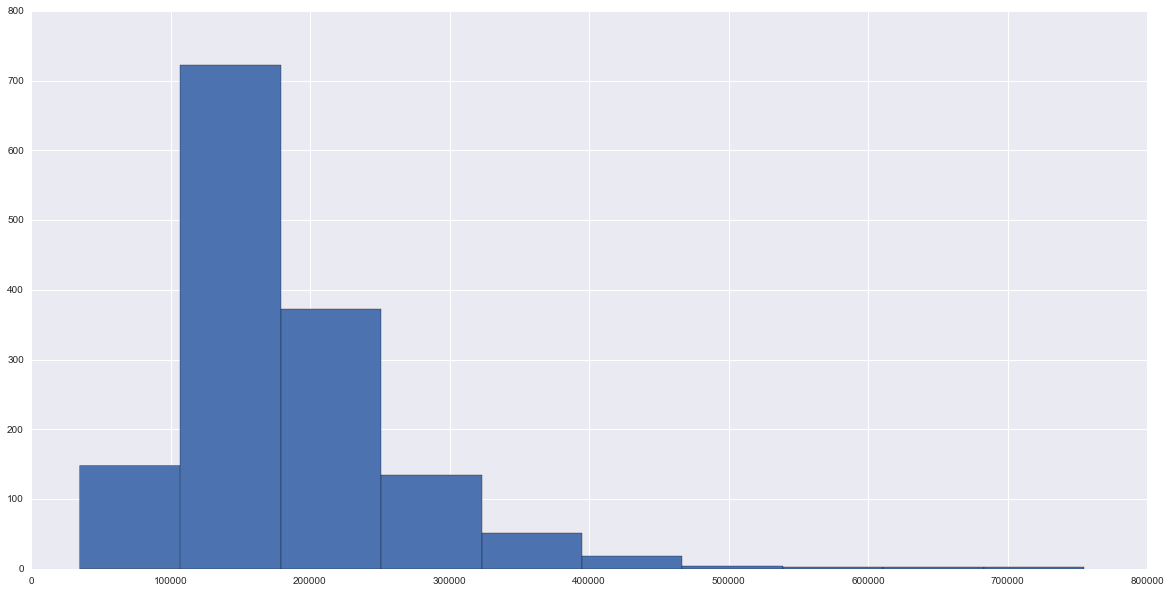

In [33]:
plt.plot(skewness.values)
plt.show()
plt.hist(y)
plt.show()

In [34]:
for col in skewness[skewness != 0.0].index:
    train_copy[col] = np.log1p(train_copy[col])
train_copy.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,4.110874,4.189655,9.042040,2.079442,1.791759,7.602900,7.602900,5.283204,6.561031,0.0,...,0.0,0.0,0.0,0.693147,0.000000,0.0,0.0,0.0,0.693147,0.0
1,3.044522,4.394449,9.169623,1.945910,2.197225,7.589336,7.589336,0.000000,6.886532,0.0,...,0.0,0.0,0.0,0.693147,0.000000,0.0,0.0,0.0,0.693147,0.0
2,4.110874,4.234107,9.328212,2.079442,1.791759,7.601902,7.602401,5.093750,6.188264,0.0,...,0.0,0.0,0.0,0.693147,0.000000,0.0,0.0,0.0,0.693147,0.0
3,4.262680,4.110874,9.164401,2.079442,1.791759,7.557995,7.586296,0.000000,5.379897,0.0,...,0.0,0.0,0.0,0.693147,0.693147,0.0,0.0,0.0,0.000000,0.0
4,4.110874,4.442651,9.565284,2.197225,1.791759,7.601402,7.601402,5.860786,6.486161,0.0,...,0.0,0.0,0.0,0.693147,0.000000,0.0,0.0,0.0,0.693147,0.0


In [35]:
y = log1p(y)
y.head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

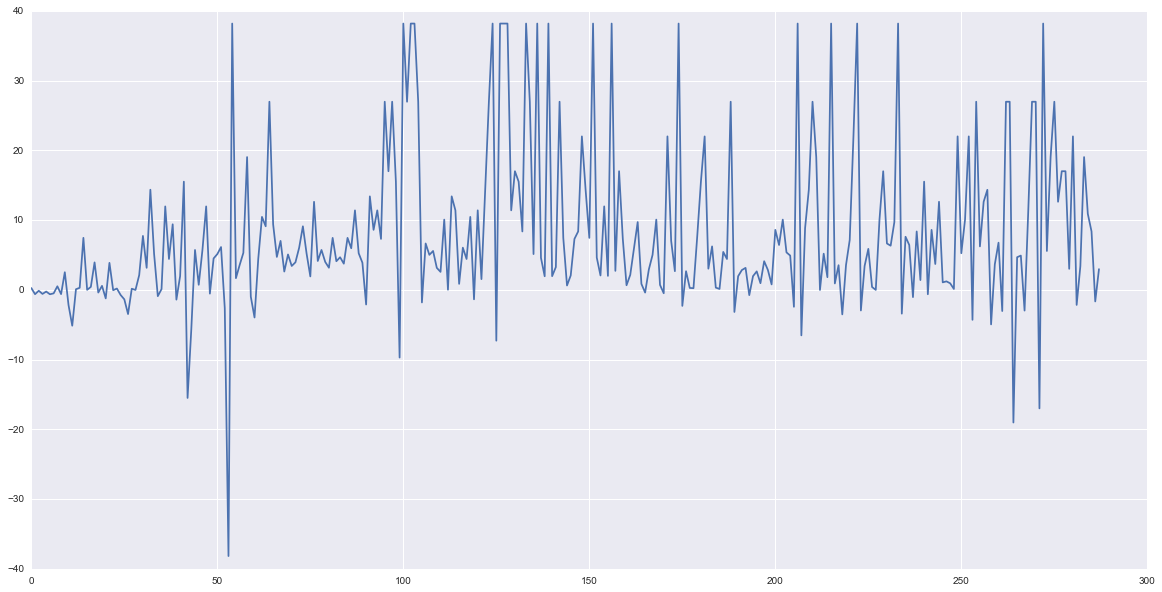

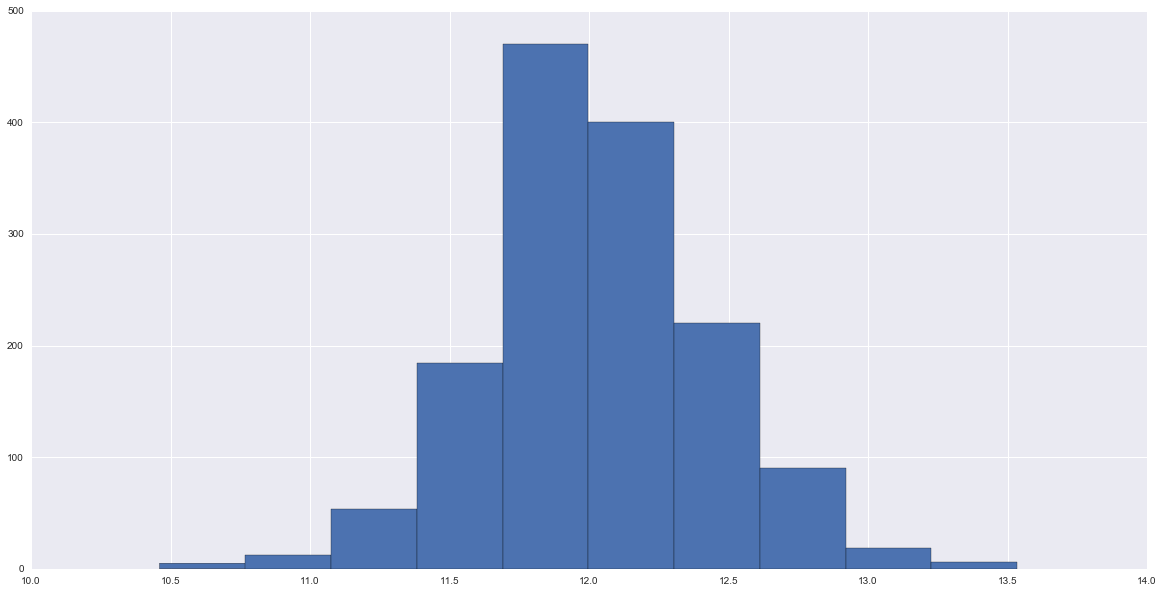

In [36]:
plt.plot(skew(train_copy))
plt.show()
plt.hist(y)
plt.show()

In [37]:
train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


## Applying Random Forest regressor after log transform

In [38]:
train_copy.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,4.110874,4.189655,9.042040,2.079442,1.791759,7.602900,7.602900,5.283204,6.561031,0.0,...,0.0,0.0,0.0,0.693147,0.000000,0.0,0.0,0.0,0.693147,0.0
1,3.044522,4.394449,9.169623,1.945910,2.197225,7.589336,7.589336,0.000000,6.886532,0.0,...,0.0,0.0,0.0,0.693147,0.000000,0.0,0.0,0.0,0.693147,0.0
2,4.110874,4.234107,9.328212,2.079442,1.791759,7.601902,7.602401,5.093750,6.188264,0.0,...,0.0,0.0,0.0,0.693147,0.000000,0.0,0.0,0.0,0.693147,0.0
3,4.262680,4.110874,9.164401,2.079442,1.791759,7.557995,7.586296,0.000000,5.379897,0.0,...,0.0,0.0,0.0,0.693147,0.693147,0.0,0.0,0.0,0.000000,0.0
4,4.110874,4.442651,9.565284,2.197225,1.791759,7.601402,7.601402,5.860786,6.486161,0.0,...,0.0,0.0,0.0,0.693147,0.000000,0.0,0.0,0.0,0.693147,0.0


In [39]:
X_train,X_test,y_train,y_test = train_test_split(train_copy,y,train_size=0.3,random_state=7)
print X_train.shape,y_train.shape
print X_test.shape,y_test.shape

(438, 288) (438,)
(1022, 288) (1022,)


### Random Forest Regressor

In [40]:
rfr = RandomForestRegressor(n_estimators=100)
rfr.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [41]:
print np.sqrt(mean_squared_error(y_test,rfr.predict(X_test)))

0.160974310911


### Lasso Regressor

In [42]:
from sklearn.linear_model import Lasso
from sklearn.cross_validation import cross_val_score

In [43]:
lasso = Lasso()
lasso.fit(X_train,y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [44]:
print np.sqrt(mean_squared_error(y_test,lasso.predict(X_test)))

0.395393286222


In [45]:
params = [0.1,0.001,0.0001,0.00001]

Alpha: 0.1
Alpha: 0.001
Alpha: 0.0001
Alpha: 1e-05
0.126990542653


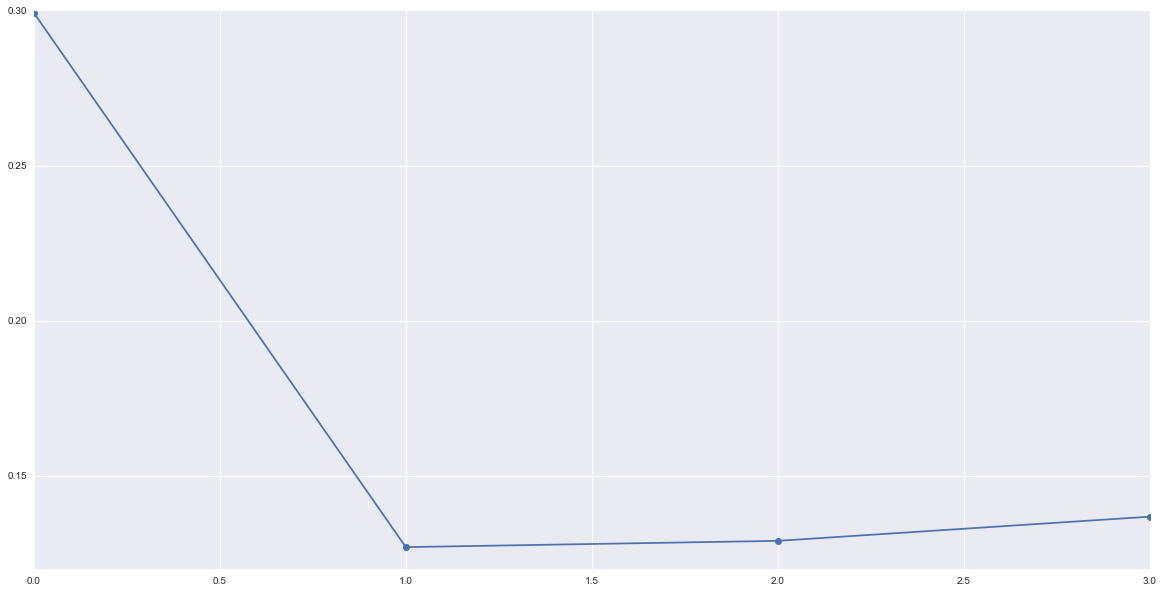

In [46]:
score = []
for alpha in params:
    print 'Alpha: {}'.format(alpha)
    lasso = Lasso(alpha=alpha)
    score.append(cross_val_score(lasso,train_copy,y,cv=5, scoring = rmse).mean())
print min(score)
plt.plot(score,'-o')

Alpha: 0.0001
Score: 0.129018551883
Alpha: 0.0002
Score: 0.125634203632
Alpha: 0.0003
Score: 0.12438994973
Alpha: 0.0004
Score: 0.123994641748
Alpha: 0.0005
Score: 0.123955836336
Alpha: 0.0006
Score: 0.124255409798
Alpha: 0.0007
Score: 0.124807541301
Alpha: 0.0008
Score: 0.125394551184
Alpha: 0.0009
Score: 0.126141097784
Minimun RMSE: 0.123955836336


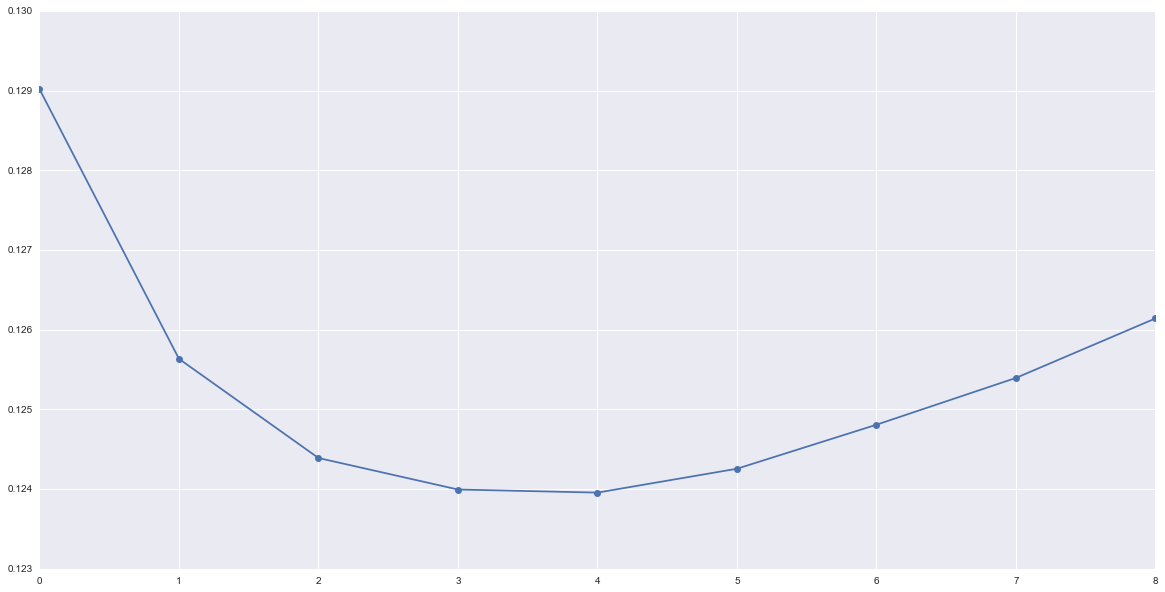

In [47]:
score = []
for alpha in np.arange(0.0001,0.001,0.0001):
    print 'Alpha: {}'.format(alpha)
    lasso = Lasso(alpha=alpha)
    score.append(cross_val_score(lasso,train_copy,y,cv=5, scoring = rmse).mean())
    print 'Score: {}'.format(cross_val_score(lasso,train_copy,y,cv=5, scoring = rmse).mean())
print 'Minimun RMSE: {}'.format(min(score))
plt.plot(score,'-o')

Yasir's results prove that one hot encoding is needed in case of all linear models

In [58]:
lasso = Lasso(alpha=0.0005)
print cross_val_score(lasso,train_copy,y,cv=5,scoring=rmse).mean()

0.123955836336


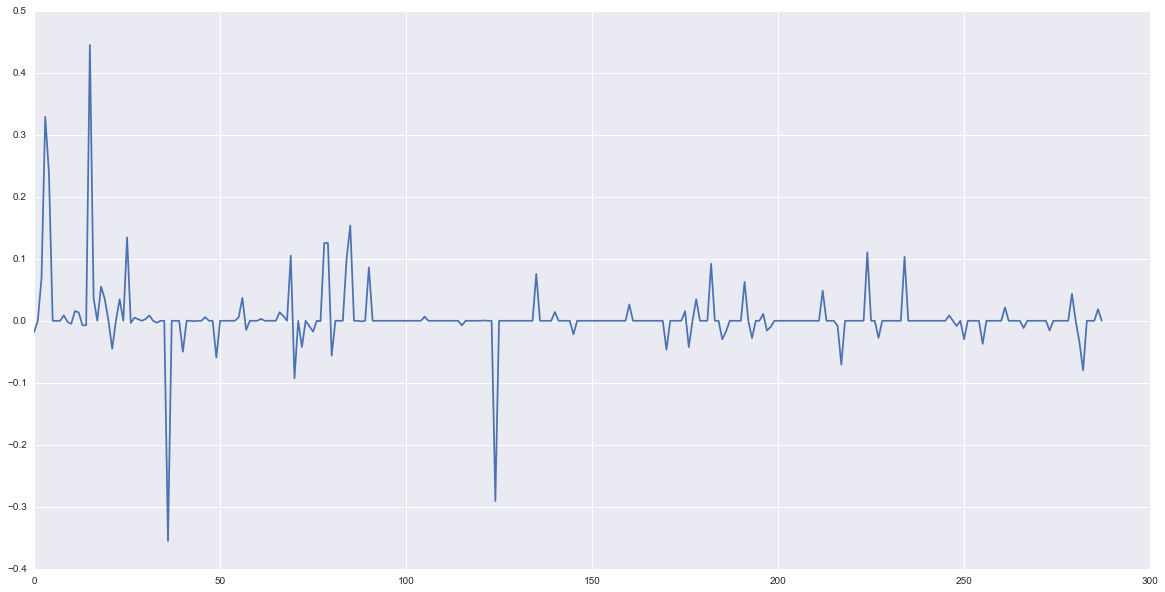

In [59]:
lasso.fit(train_copy,y)
plt.plot(lasso.coef_)

In [60]:
from sklearn.metrics import r2_score

In [62]:
lasso = Lasso(alpha=0.005)
lasso.fit(X_train,y_train)

Lasso(alpha=0.005, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [64]:
print 'CV RMSE: {}'.format(rmse(lasso,X_test,y_test))
print 'R2 Score: {}'.format(round(r2_score(y_test,lasso.predict(X_test))))

CV RMSE: 0.157034886304
R2 Score: 1.0
